# Multiple Linear Regression 

For this example we will be using a linear regression to try to fit a model that explains how mpg (miles per gallon) is affected by multiple factors which are horsepower, weight, and acceleration.

First, let's load the data.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\ivane\Desktop\ACI-1\data\auto-mpg-simple2.csv')

df.info()
print('------------------------------------')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   horsepower    392 non-null    int64  
 2   weight        392 non-null    int64  
 3   acceleration  392 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.4 KB
------------------------------------


,mpg,horsepower,weight,acceleration
0,18.0,130,3504,12.0
1,15.0,165,3693,11.5
2,18.0,150,3436,11.0
3,16.0,150,3433,12.0
4,17.0,140,3449,10.5


## Data Exploration

Let's give a quick look to how data is distributed by using box plots and scatter plots.

Here is an illustration on how to interpret box plots:

![BoxPlots](https://images.nagwa.com/figures/explainers/812192146073/1.svg)

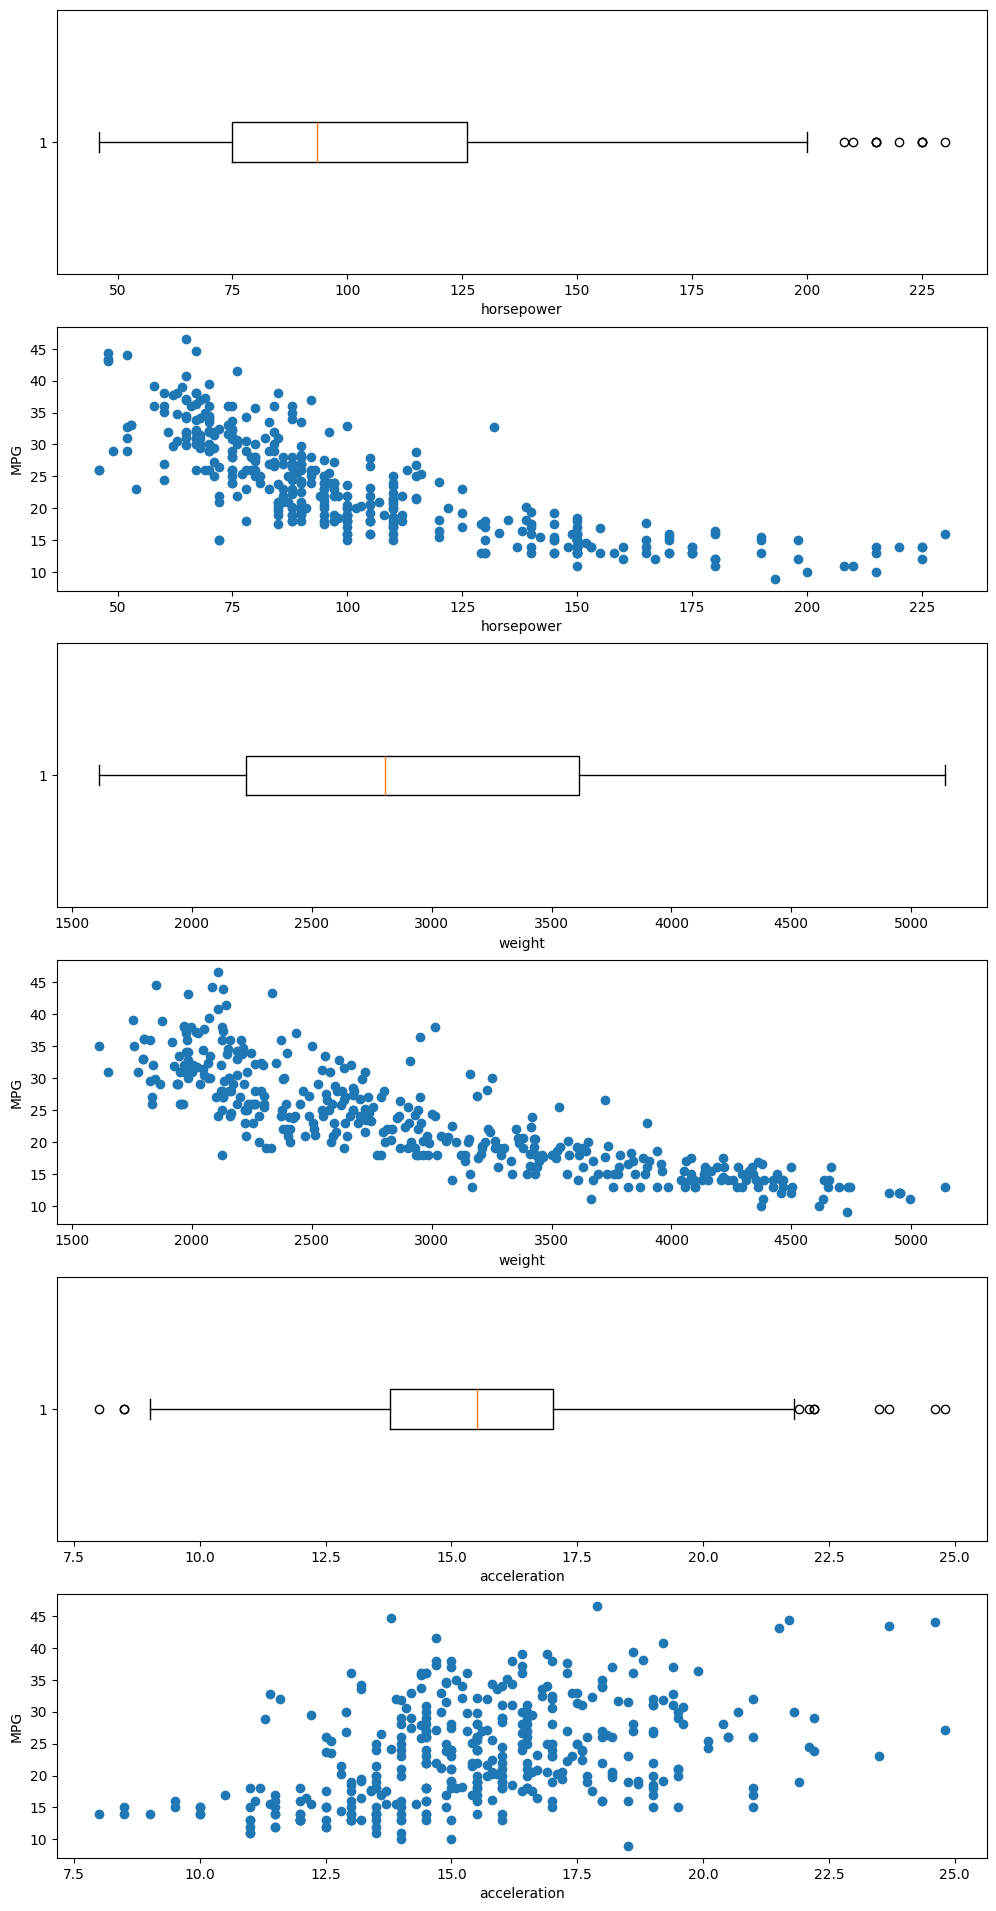

In [7]:
fig, ax = plt.subplots(6,1, figsize=(12,24))

features = ['horsepower', 'weight', 'acceleration']

i=0

for feature in features:
    ax[i].boxplot(df[feature], vert=False)
    ax[i].set_xlabel(feature)
    i+=1
    
    ax[i].scatter(df[feature], df.mpg)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('MPG')
    i+=1

Looking at these graphs it seems horsepower and weight have the biggest negative effect on MPG.

### Note 
* From the boxplot of horsepower, we can see that there are some outliers and the data is skewed. it appears that there is a negative correlation to the target variable MPG. Alos form the scatter plot, we can note that the data behaves more in a polynomial fashion, and that the data is not homosedastic but is heterosedastic.
* In regards to weight, we can see that there are no outliers and the data is skewed. There appears to be a negative correlation with the data following a polynomial fashion.
* Finally, we can see that there are outliers but less skewed. We also note that the data is more sparse thus indicating that this predictor is the least effective of all predictors in predicting the target varaible MPG.

## Simple Linear Regression

Let's create a regression model for each of the features, and check the summary.

R-Squared for horsepower is 0.61
R-Squared for weight is 0.69
R-Squared for acceleration is 0.18


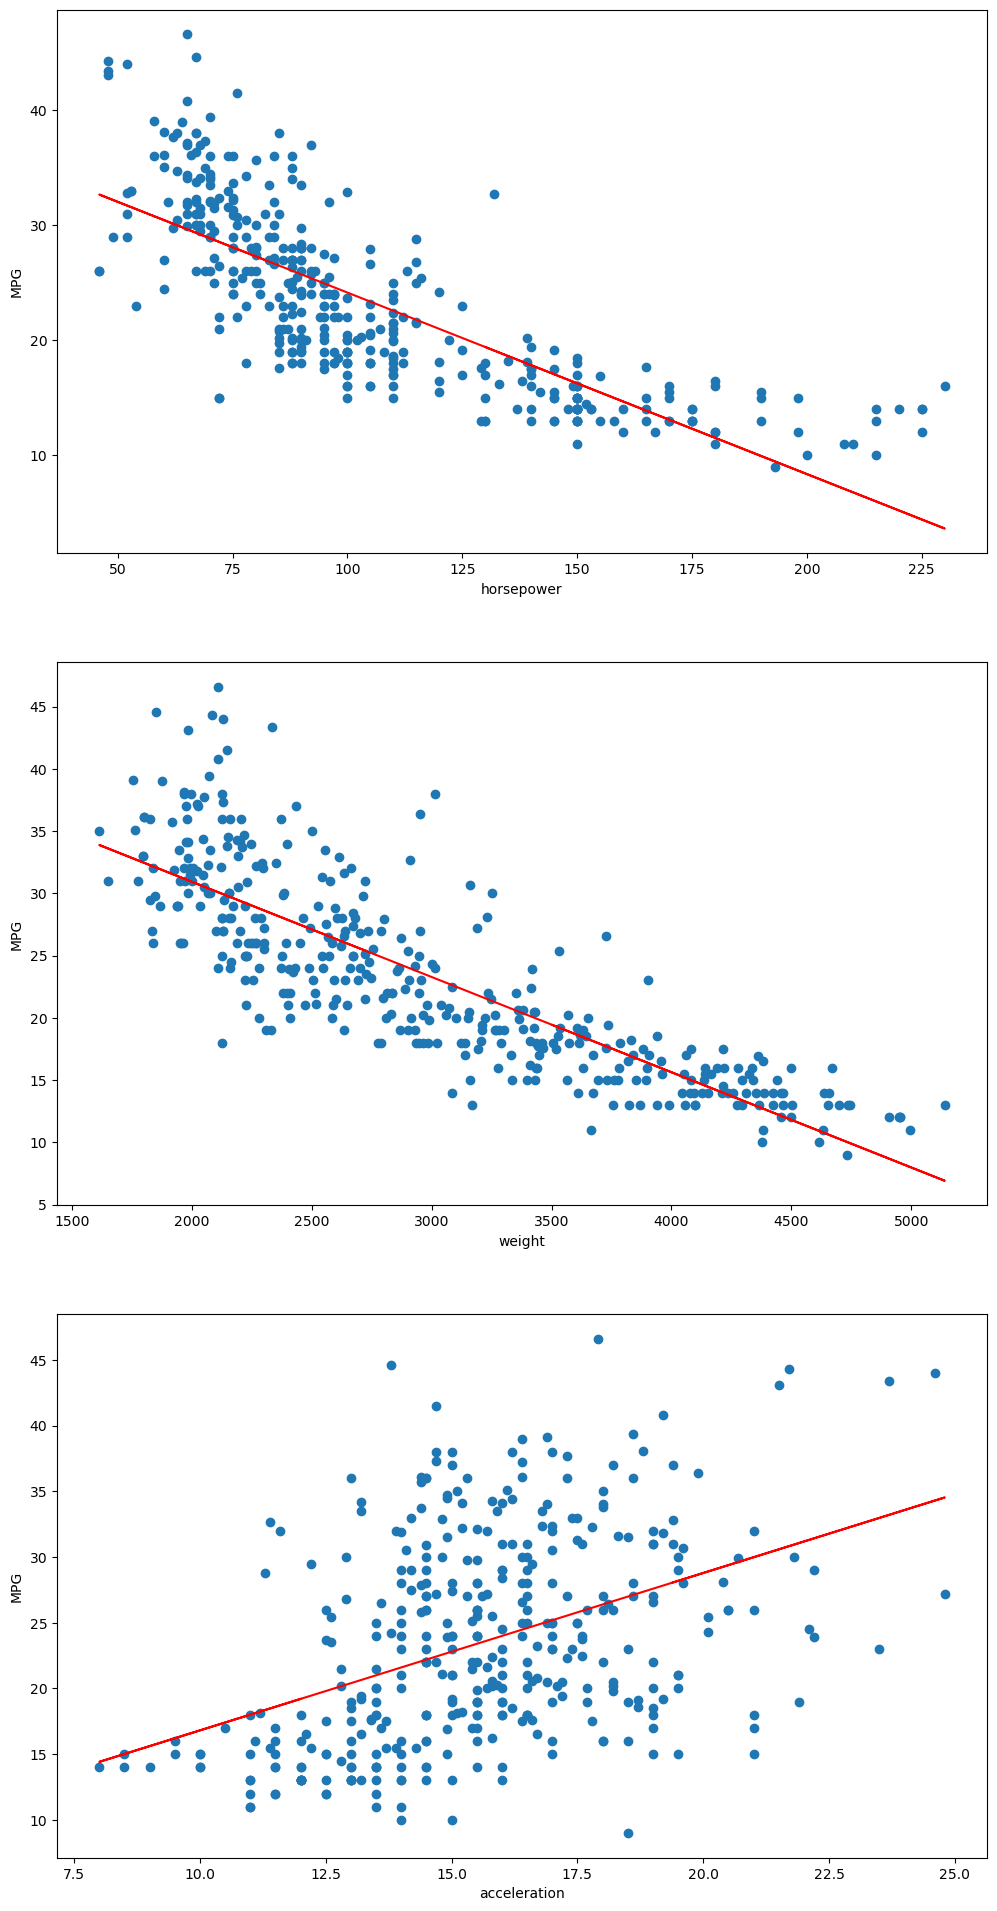

We can see that horsepower and weight have similar R-Values (0.61, and 0.69), and acceleration has a very small R-Value of 0.18.

## Multiple Linear Regression

Rather than applying regression on individual features, we can combine them and attempt a multiple regression model.

0.7041051933641558


We can see that the R-Squared value is $0.704$ which is better than each individual R-Squared value.

Let's look at summary now.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     311.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          7.48e-103
Time:                        14:30:13   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     388   BIC:                             2266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.6783      2.409     18.965      0.000      40.943      50.414
horsepower      -0.0475      0.016     -2.970      0.003      -0.079      -0.016
weight          -0.0058      0.001    -10.024      0.000      -0.007      -0.005
acceleration    -0.0021      0.123     -0.017      0.987      -0.245       0.240
==============================================================================
Omnibus:                       35.392   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.071
Skew:                           0.684   Prob(JB):                     9.91e-11
Kurtosis:                       3.975   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the Adjusted R-Squared is at 0.704,  F-Statistic is at 311 with its probability set very low. This means our model is good.

Let's look at the features now:
- Horsepower has a p of 0.003
- Weight has a p of 0
- Acceleration has a p of 0.987

This means that the best features are horsepower and weight since both are less than 0.05. 

Let's remove Acceleration and try again.

0.7048656350343583


The adjusted R-Squared is just a 0.001 more. Let's look at the summary.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.06e-104
Time:                        14:30:13   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-Statistic is higher, so we can see that acceleration does not have an effect on MPG, and we can remove it.